In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
fires = gpd.read_file('./datas/ca_wildfires.shp')

In [3]:
fires.head()

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Leng,Shape_Area,geometry
0,1.0,2007-01-01,CA,CCO,LAC,OCTOBER,00246393,2007/10/21 00:00:00.000,2007/10/23 00:00:00.000,14.0,None,NaN,25.736713,8.0,1.0,00233414,1902.439051,1.041528e+05,POLYGON ((138036.9056999981 -402646.3633000003...
1,2.0,2007-01-01,CA,CCO,LAC,MAGIC,00233077,2007/10/22 00:00:00.000,2007/10/25 00:00:00.000,14.0,None,NaN,2824.877197,8.0,1.0,00233077,20407.965662,1.143187e+07,POLYGON ((130072.4873999991 -398622.8415000001...
2,3.0,2007-01-01,CA,USF,ANF,RANCH,00000166,2007/10/20 00:00:00.000,2007/11/15 00:00:00.000,2.0,None,54716.0,58410.335938,7.0,1.0,00000166,169150.715690,2.363782e+08,POLYGON ((114013.9736000001 -379231.7455000002...
3,4.0,2007-01-01,CA,CCO,LAC,EMMA,00201384,2007/09/11 00:00:00.000,2007/09/11 00:00:00.000,14.0,None,NaN,172.214951,8.0,1.0,00201384,6117.777086,6.969292e+05,POLYGON ((176902.2364000008 -388673.0824999996...
4,5.0,2007-01-01,CA,CCO,LAC,CORRAL,00259483,2007/11/24 00:00:00.000,2007/11/27 00:00:00.000,14.0,None,NaN,4707.997070,8.0,1.0,00259483,22907.182174,1.905259e+07,"POLYGON ((115905.0064000003 -436381.1365, 1159..."


In [4]:
fires['YEAR_'].value_counts()

2017-01-01    607
2008-01-01    438
2018-01-01    411
1979-01-01    367
2016-01-01    352
2012-01-01    351
2007-01-01    349
2003-01-01    341
1996-01-01    321
1980-01-01    319
2015-01-01    318
2011-01-01    317
2006-01-01    315
2005-01-01    306
2013-01-01    298
1987-01-01    286
1999-01-01    279
2004-01-01    277
1981-01-01    275
1917-01-01    266
1988-01-01    258
2009-01-01    254
1924-01-01    251
2002-01-01    243
2014-01-01    238
1970-01-01    233
1950-01-01    227
1951-01-01    221
1984-01-01    220
1994-01-01    218
             ... 
1930-01-01    108
1914-01-01    105
1946-01-01    102
1942-01-01    101
1938-01-01    100
1927-01-01     99
1925-01-01     91
1910-01-01     90
1940-01-01     89
1991-01-01     89
1913-01-01     86
1935-01-01     84
1963-01-01     79
1933-01-01     72
1948-01-01     66
1965-01-01     62
1937-01-01     59
1912-01-01     57
1909-01-01     24
1908-01-01     16
1900-01-01     12
1907-01-01     10
1898-01-01      5
1906-01-01      4
1903-01-01

In [5]:
fires['YEAR_'] = pd.to_datetime(fires['YEAR_'])

In [6]:
fires_by_year = fires.groupby('YEAR_')[['GIS_ACRES', 'Shape_Area']].sum()

In [7]:
# creating 'number of fires' feature based on aggregatation of fires by year 
fires_by_year['num_fires'] = fires['YEAR_'].value_counts()

In [8]:
fires_by_year['max_fire_size'] = fires.groupby('YEAR_')[['GIS_ACRES']].max()

In [9]:
fires_by_year['avg_fire_size'] = fires_by_year['GIS_ACRES'] / fires_by_year['num_fires']

In [10]:
fires_by_year.rename(mapper = {'GIS_ACRES':'total_acres_burned', 'Shape_Area': 'total_area_burned'}, 
                     axis = 'columns', inplace = True)

In [11]:
fires_by_year.head()

,total_acres_burned,total_area_burned,num_fires,max_fire_size,avg_fire_size
YEAR_,,,,,
1878-01-01,59468.882812,2.406620e+08,1,59468.882812,59468.882812
1895-01-01,628.113647,2.541886e+06,1,628.113647,628.113647
1896-01-01,7531.716797,3.047978e+07,1,7531.716797,7531.716797
1898-01-01,28244.199219,1.143002e+08,5,20539.949219,5648.839844
1900-01-01,24528.506020,9.926334e+07,12,16960.494141,2044.042168


In [12]:
def multiplot(df, columns = list, title = None):
    
    if len(columns) % 2 == 0:
        nrows = int(len(columns)/2)
    else:
        nrows = int((len(columns)/2) + 0.5)

    fig, ax = plt.subplots(nrows = nrows, ncols = 2, figsize = (12, 5 * nrows))
    plt.tight_layout(pad=3)
    ax = ax.ravel()
    
    for i, column in enumerate(columns):
        ax[i].plot(df[column])   
        ax[i].set_title(column)
        ax[i].set_xlabel('Year')
        ax[i].set_ylabel('')

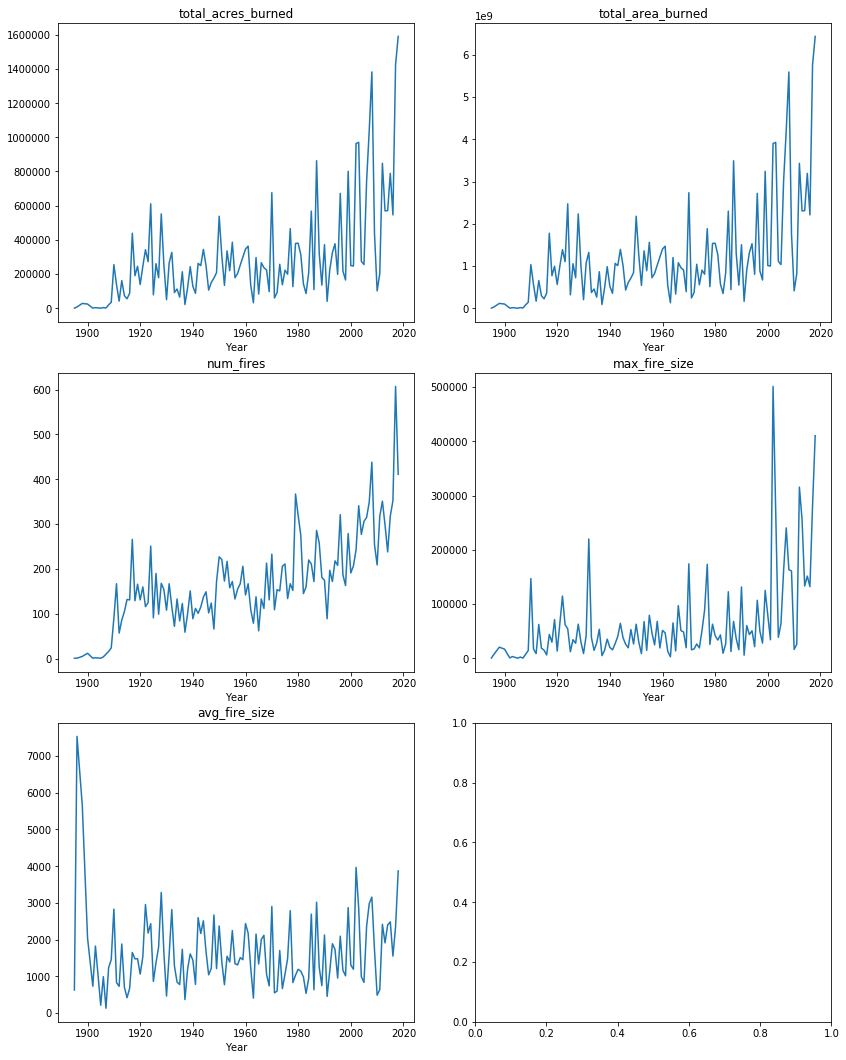

In [13]:
multiplot(df = fires_by_year[1:], columns = ['total_acres_burned', 'total_area_burned', 
                                             'num_fires', 'max_fire_size','avg_fire_size']);

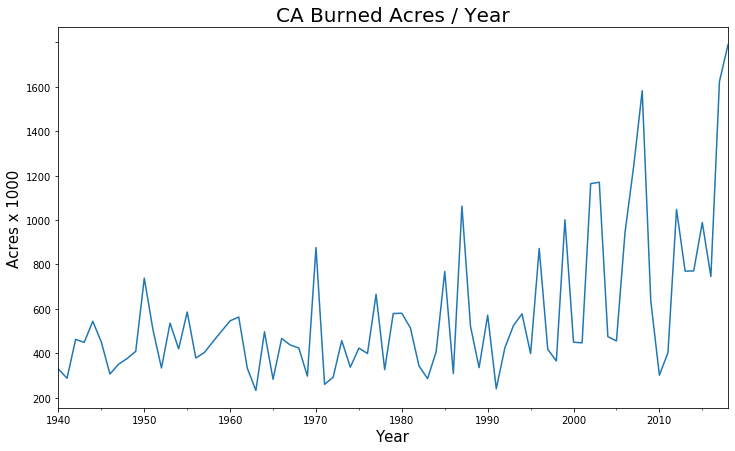

In [14]:
fig = fires_by_year['total_acres_burned'][42:].plot(figsize = (12, 7))
fig.set_title('CA Burned Acres / Year', fontsize = 20)
fig.set_xlabel('Year', fontsize = 15)
fig.set_ylabel('Acres x 1000', fontsize = 15)
fig.set_yticklabels(['0', '200', '400', '600', '800', '1000',
                     '1200', '1400', '1600']);